# Twitter data analysis

In [172]:
import tweepy
import pandas as pd
import time
import numpy as np
import regex as re
import matplotlib.pyplot as plt
import seaborn as sns
import string
from textblob import TextBlob
from dotenv import load_dotenv

Getting data from twitter API

In [ ]:
load_dotenv()

TWITTER_CONSUMER_KEY = os.getenv('TWITTER_CONSUMER_KEY')
TWITTER_CONSUMER_SECRET = os.getenv('TWITTER_CONSUMER_SECRET')
TWITTER_ACCESS_TOKEN = os.getenv('TWITTER_ACCESS_TOKEN')
TWITTER_ACCESS_TOKEN_SECRET = os.getenv('TWITTER_ACCESS_TOKEN_SECRET')


auth = tweepy.OAuthHandler(TWITTER_CONSUMER_KEY, TWITTER_CONSUMER_SECRET)
auth.set_access_token(TWITTER_ACCESS_TOKEN, TWITTER_ACCESS_TOKEN_SECRET)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [ ]:
# run this once to get data from API, after that, use saved data
text_query = 'depression'
count = 5000
try:
 tweets = tweepy.Cursor(api.search_tweets,q=text_query).items(count)
 tweets_list = [[tweet.created_at, tweet.user.screen_name,tweet.favorite_count,tweet.retweet_count, tweet.text] for tweet in tweets]
 tweets_df = pd.DataFrame(tweets_list)
 
except BaseException as e:
    print('failed on_status,',str(e))
    time.sleep(3)

In [ ]:
tweets_df.to_csv("uncleaned/twitter.csv")
tweets_df.head()

In [173]:
tweets_df=pd.read_csv("uncleaned/twitter.csv")
tweets_df=tweets_df.drop(tweets_df.columns[0], axis = 1)
tweets_df.head()

,0,1,2,3,4
0,2021-12-05 14:14:36+00:00,iPanicffs,0,1,RT @Noty0urslutt: At this point depression is ...
1,2021-12-05 14:14:34+00:00,TeamDobby681,0,0,@shortdestroyer 2 words [Great] [depression]
2,2021-12-05 14:14:32+00:00,EnsuraiDicky,0,6,RT @PatrissiaAna: Win Dota2 game -&gt; feel no...
3,2021-12-05 14:14:31+00:00,Igotnoroots1,0,0,"@HotKat74 Well, the darkness has an effect, bu..."
4,2021-12-05 14:14:31+00:00,Tanzz_xo,0,6,RT @cookiesnkarimm: that pre birthday depressi...


In [174]:
tweets_df.columns=['date','user','likes','retweets','text']

rearranged_col_names=['date','user','text','likes','retweets']
tweets_df=tweets_df[rearranged_col_names]
tweets_df.head()

,date,user,text,likes,retweets
0,2021-12-05 14:14:36+00:00,iPanicffs,RT @Noty0urslutt: At this point depression is ...,0,1
1,2021-12-05 14:14:34+00:00,TeamDobby681,@shortdestroyer 2 words [Great] [depression],0,0
2,2021-12-05 14:14:32+00:00,EnsuraiDicky,RT @PatrissiaAna: Win Dota2 game -&gt; feel no...,0,6
3,2021-12-05 14:14:31+00:00,Igotnoroots1,"@HotKat74 Well, the darkness has an effect, bu...",0,0
4,2021-12-05 14:14:31+00:00,Tanzz_xo,RT @cookiesnkarimm: that pre birthday depressi...,0,6


In [175]:
# Sort dataframe by date column
tweets_df['date'] = pd.to_datetime(tweets_df['date'])
tweets_df = tweets_df.sort_values(by='date',ascending=True)
tweets_df = tweets_df.reset_index().drop('index',axis=1)
tweets_df.head()

,date,user,text,likes,retweets
0,2021-12-05 08:21:37+00:00,care_depression,RT @care_depression: 相変わらず独特なフィードバックだな、と自分でも思い...,0,1
1,2021-12-05 08:21:38+00:00,gqwarusb,RT @muftimenk: Don’t worry about what others h...,0,7750
2,2021-12-05 08:21:39+00:00,V_Sovngarde,RT @FrostStarlight2: Denial\nAnger\nBargaining...,0,2576
3,2021-12-05 08:21:44+00:00,clover4u_,RT @wooscap: We really went from Eternal Sunsh...,0,464
4,2021-12-05 08:21:48+00:00,Audrey_Abeng,2021 chez moi J’ai eu :\n- Un travail \n- une ...,17,2


In [176]:
print(tweets_df.shape)
tweets_df = tweets_df.drop_duplicates('text')
tweets_df.shape

(10000, 5)


(4551, 5)

In [177]:
#extract the tweet with more FAVs and more RTs:

fav_max = np.max(tweets_df['likes'])
rt_max = np.max(tweets_df['retweets'])

fav = tweets_df[tweets_df.likes == fav_max].index[0]
rt = tweets_df[tweets_df.retweets == rt_max].index[0]

# Max FAVs:
print("\nThe tweet with more likes is: \n{}".format(tweets_df['text'][fav]))
print("Number of likes: {}".format(fav_max))
#print("{} characters.\n".format(data['len'][fav]))

# Max RTs:
print("\nThe tweet with more retweets is: \n{}".format(tweets_df['text'][rt]))
print("Number of retweets: {}".format(rt_max))
#print("{} characters.\n".format(data['len'][rt]))


The tweet with more likes is: 
c!Phil is like that school counciler who goes

"hey champ 😁 we don't use big words like 'depression' here you're ju… https://t.co/L4vFzusQiz
Number of likes: 1092

The tweet with more retweets is: 
RT @dontcallmechia: is it me or did seasonal depression come extra seasoned this year um
Number of retweets: 65851


<AxesSubplot:xlabel='date'>

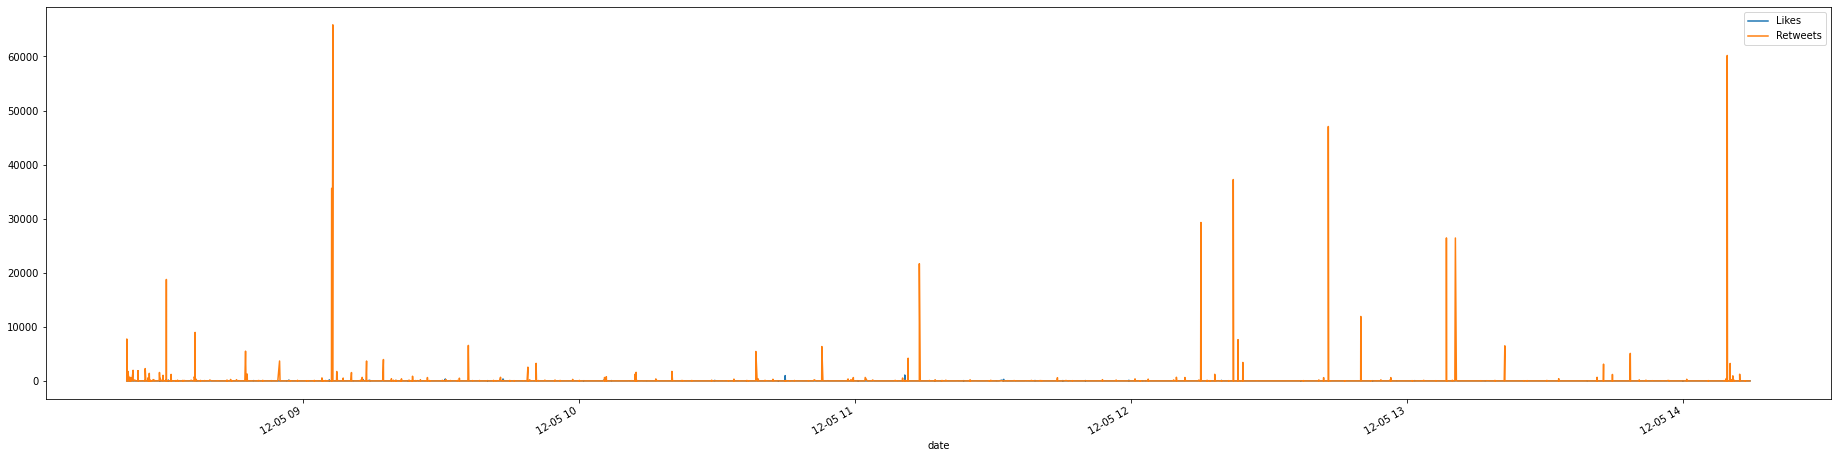

In [178]:
# Create time series for the data:

#tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=tweets_df['likes'].values, index=tweets_df['date'])
tret = pd.Series(data=tweets_df['retweets'].values, index=tweets_df['date'])

# Likes vs retweets visualization:
tfav.plot(figsize=(32,8), label="Likes", legend=True)
tret.plot(figsize=(32,8), label="Retweets", legend=True)

In [179]:
#function to extract hashtags from every tweet
def hashtag_extract(tweets):
    hashtags = []
    # Loop over the words in the tweet
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)

    return hashtags

In [180]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codevardhan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [181]:
HT_regular = hashtag_extract(tweets_df['text'])

# unnesting list
HT_unnested = sum(HT_regular,[])

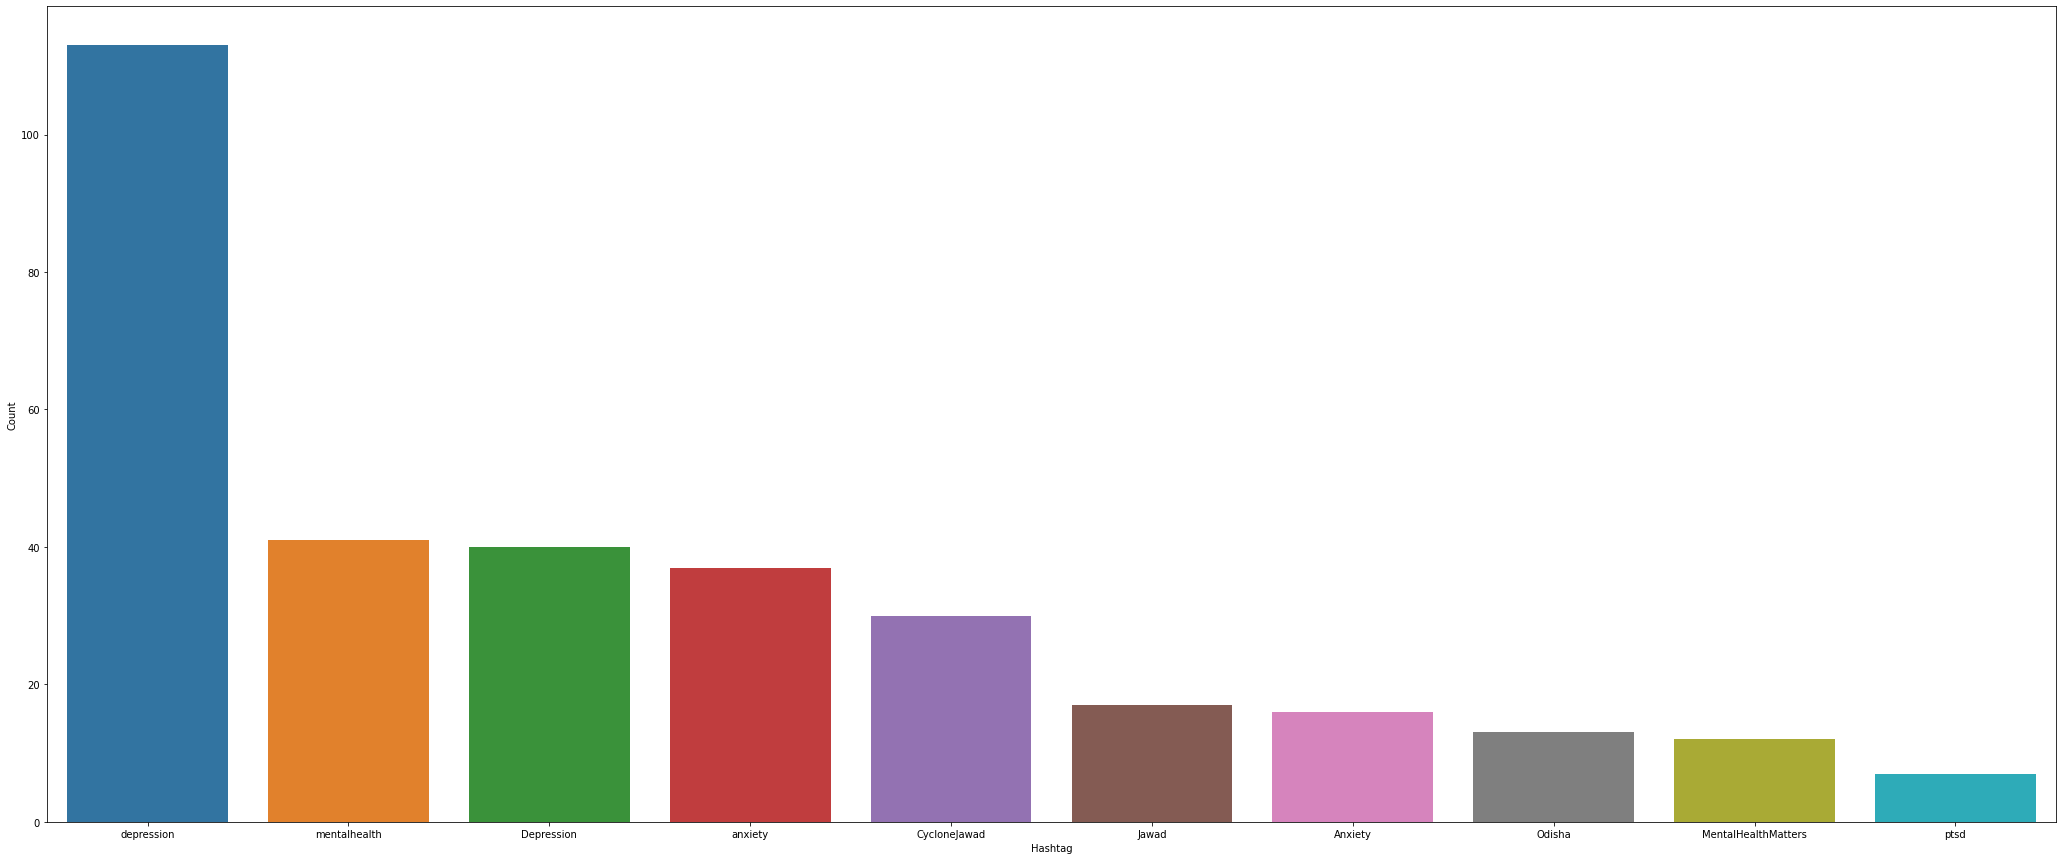

In [182]:
a = nltk.FreqDist(HT_unnested)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(36,15))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [183]:
tweets_df['likes'].corr(tweets_df['retweets'])

-0.00488280287971042

<AxesSubplot:xlabel='likes', ylabel='retweets'>

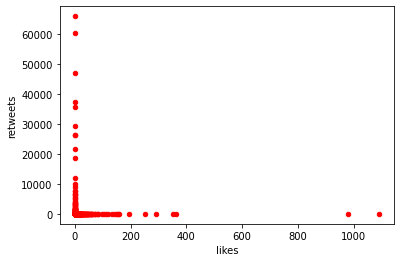

In [184]:
tweets_df.plot.scatter(x='likes',y='retweets',c='r')

In [185]:
# helper function to clean tweets
def processTweet(tweet):
    # Remove HTML special entities (e.g. &amp;)
    tweet = re.sub(r'\&\w*;', '', tweet)
    #Convert @username to AT_USER
    tweet = re.sub('@[^\s]+','',tweet)
    # Remove tickers
    tweet = re.sub(r'\$\w*', '', tweet)
    # To lowercase
    tweet = tweet.lower()
    # Remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*\/\w*', '', tweet)
    # Remove hashtags
    tweet = re.sub(r'#\w*', '', tweet)
    # Remove Punctuation and split 's, 't, 've with a space for filter
    tweet = re.sub(r'[' + string.punctuation.replace('@', '') + ']+', '', tweet)
    # Remove words with 2 or fewer letters
    tweet = re.sub(r'\b\w{1,2}\b', '', tweet)
    # Remove whitespace (including new line characters)
    tweet = re.sub(r'\s\s+', ' ', tweet)
    # Remove single space remaining at the front of the tweet.
    tweet = tweet.lstrip(' ') 
    # Remove characters beyond Basic Multilingual Plane (BMP) of Unicode:
    tweet = ''.join(c for c in tweet if c <= '\uffff') 
    return tweet
#
#df1 = df.loc['0':'5', 'text': ]
tweets_df['clean_text'] = tweets_df['text'].apply(processTweet)
tweets_df.head()


,date,user,text,likes,retweets,clean_text
0,2021-12-05 08:21:37+00:00,care_depression,RT @care_depression: 相変わらず独特なフィードバックだな、と自分でも思い...,0,1,相変わらず独特なフィードバックだな、と自分でも思いますが、ぼくの添削はもれなく例え付きなので...
1,2021-12-05 08:21:38+00:00,gqwarusb,RT @muftimenk: Don’t worry about what others h...,0,7750,don’ worry about what others have focus what y...
2,2021-12-05 08:21:39+00:00,V_Sovngarde,RT @FrostStarlight2: Denial\nAnger\nBargaining...,0,2576,denial\nanger\nbargaining\ndepression\nmemes
3,2021-12-05 08:21:44+00:00,clover4u_,RT @wooscap: We really went from Eternal Sunsh...,0,464,really went from eternal sunshine eternal depr...
4,2021-12-05 08:21:48+00:00,Audrey_Abeng,2021 chez moi J’ai eu :\n- Un travail \n- une ...,17,2,2021 chez moi ’ travail une voiture diplôme un...


In [186]:
# drop duplicates
tweets_df = tweets_df.drop_duplicates('clean_text')
tweets_df.shape

(4175, 6)

In [187]:
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

tweets_df['category'] = tweets_df['clean_text'].apply(analyze_sentiment)
tweets_df.head()

/tmp/ipykernel_14235/4271762893.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_df['category'] = tweets_df['clean_text'].apply(analyze_sentiment)


,date,user,text,likes,retweets,clean_text,category
0,2021-12-05 08:21:37+00:00,care_depression,RT @care_depression: 相変わらず独特なフィードバックだな、と自分でも思い...,0,1,相変わらず独特なフィードバックだな、と自分でも思いますが、ぼくの添削はもれなく例え付きなので...,0
1,2021-12-05 08:21:38+00:00,gqwarusb,RT @muftimenk: Don’t worry about what others h...,0,7750,don’ worry about what others have focus what y...,1
2,2021-12-05 08:21:39+00:00,V_Sovngarde,RT @FrostStarlight2: Denial\nAnger\nBargaining...,0,2576,denial\nanger\nbargaining\ndepression\nmemes,-1
3,2021-12-05 08:21:44+00:00,clover4u_,RT @wooscap: We really went from Eternal Sunsh...,0,464,really went from eternal sunshine eternal depr...,1
4,2021-12-05 08:21:48+00:00,Audrey_Abeng,2021 chez moi J’ai eu :\n- Un travail \n- une ...,17,2,2021 chez moi ’ travail une voiture diplôme un...,0


In [188]:
# check the number of positive vs. negative tagged sentences
positives = tweets_df['category'][tweets_df.category == 1]
negatives = tweets_df['category'][tweets_df.category == -1]
neutrals = tweets_df['category'][tweets_df.category == 0]


print('number of positve categorized text is:  {}'.format(len(positives)))
print('number of negative categorized text is: {}'.format(len(negatives)))
print('number of neutral categorized text is: {}'.format(len(neutrals)))
print('total length of the data is:            {}'.format(tweets_df.shape[0]))

number of positve categorized text is:  1188
number of negative categorized text is: 892
number of neutral categorized text is: 2095
total length of the data is:            4175


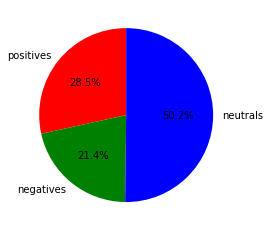

In [189]:
slices_len = [len(positives), len(negatives), len(neutrals)]
category = ['positives', 'negatives', 'neutrals']
colors = ['r', 'g', 'b']

plt.pie(slices_len, labels=category, colors=colors, startangle=90, autopct='%.1f%%')
plt.show()

In [190]:
# tokenize helper function
import string
from nltk.corpus import stopwords

def text_process(raw_text):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in list(raw_text) if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.lower().split() if word.lower() not in stopwords.words('english')]

def remove_words(word_list):
    remove = ['depression','suicide','kill','depressed','hated','cry','…','death’']
    return [w for w in word_list if w not in remove]
# -------------------------------------------
# tokenize message column and create a column for tokens
tweets_df = tweets_df.copy()
tweets_df['tokens'] = tweets_df['clean_text'].apply(text_process) # tokenize style 1
tweets_df['no_sad'] = tweets_df['tokens'].apply(remove_words) #tokenize style 2
tweets_df = tweets_df.drop(['tokens'],axis=1)
tweets_df.head()

,date,user,text,likes,retweets,clean_text,category,no_sad
0,2021-12-05 08:21:37+00:00,care_depression,RT @care_depression: 相変わらず独特なフィードバックだな、と自分でも思い...,0,1,相変わらず独特なフィードバックだな、と自分でも思いますが、ぼくの添削はもれなく例え付きなので...,0,[相変わらず独特なフィードバックだな、と自分でも思いますが、ぼくの添削はもれなく例え付きなの...
1,2021-12-05 08:21:38+00:00,gqwarusb,RT @muftimenk: Don’t worry about what others h...,0,7750,don’ worry about what others have focus what y...,1,"[don’, worry, others, focus, that’, gratitude,..."
2,2021-12-05 08:21:39+00:00,V_Sovngarde,RT @FrostStarlight2: Denial\nAnger\nBargaining...,0,2576,denial\nanger\nbargaining\ndepression\nmemes,-1,"[denial, anger, bargaining, memes]"
3,2021-12-05 08:21:44+00:00,clover4u_,RT @wooscap: We really went from Eternal Sunsh...,0,464,really went from eternal sunshine eternal depr...,1,"[really, went, eternal, sunshine, eternal]"
4,2021-12-05 08:21:48+00:00,Audrey_Abeng,2021 chez moi J’ai eu :\n- Un travail \n- une ...,17,2,2021 chez moi ’ travail une voiture diplôme un...,0,"[2021, chez, moi, ’, travail, une, voiture, di..."


In [191]:
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"
stop_words = stopwords.words("english")

def preprocess(text, stem=False):
    # Remove link,user and special characters
    text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
    if text=="":
        return "none"
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

In [192]:
tweets_df.clean_text = tweets_df.clean_text.apply(lambda x: preprocess(x))

In [193]:
tweets_df=tweets_df.drop(["likes", "date","user","retweets","text","no_sad"], axis = 1)
tweets_df.to_csv("data/tweets.csv")
tweets_df.drop(tweets_df[tweets_df['clean_text'] =="none"].index, inplace = True)
tweets_df.head()


,clean_text,category
1,worry others focus gratitude pave way calm hea...,1
2,denial anger bargaining depression memes,-1
3,really went eternal sunshine eternal depression,1
4,2021 chez moi travail une voiture dipl une gro...,0
5,post concert depression hitting hard favorite ...,1
